# Time-series Analysis

Time-series analysis involves analyzing data that is collected over a period of time at regular intervals. This type of data is common in monitoring and management of estuaries. Time-series analysis aims to identify patterns, trends, and relationships in the data

There are several techniques for time-series analysis, some of which are:

(1) Descriptive Statistics: Descriptive statistics can provide useful information about the central tendency, variability, and distribution of the data. Measures such as mean, median, standard deviation, and skewness can be calculated for time-series data.

(2) Time-Series Plots: Time-series plots are a graphical representation of the data over time. These plots can reveal patterns and trends in the data. For example, you can plot the changes in water temperature over time to identify seasonal variations.


(3) Seasonal Analysis: Seasonal analysis involves identifying patterns that repeat at regular intervals, such as daily, weekly, or seasonal patterns. This can be done using time-series decomposition methods such as seasonal decomposition of time series (STL).


(4) Trend Analysis: Trend analysis involves identifying long-term trends in the data. This can be done by fitting a trend line to the data using regression analysis, or by using time-series decomposition methods such as the Hodrick-Prescott filter.

(5) Noise: Noise in time-series data refers to random fluctuations or variations in the data that do not have a clear underlying pattern or cause.

(6) Autocorrelation Analysis: Autocorrelation analysis is used to identify correlations between data points at different lags. It can help identify trends or cyclic patterns in the data.

(7) Time-Series Modeling: Time-series modeling involves developing a mathematical model that describes the relationship between the observed data and the underlying processes that generate it. Popular time-series models include ARIMA, SARIMA, and Prophet.


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [56]:
# load in the csv file, you need to specify the directory of the data file
infile = '../data/processed/Cleaned_mooring_2020.csv'
# colnames = ['Temp_AC','Sal_AC','Fluor_AC','Chl_AC','Temp_NY','Sal_NY','Fluor_NY','Chl_NY','Temp_NY_btm','Sal_NY_btm','Fluor_NY_btm','Chl_NY_btm','DateTime_NY']
data = pd.read_csv(infile, skiprows = [12,14], parse_dates=['Date_Time_NY'], infer_datetime_format=True, sep = ',')

### (1) Descriptive Statistics

In [57]:
data.shape

(12190, 15)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12190 entries, 0 to 12189
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_Time_NY        12190 non-null  datetime64[ns]
 1   Temp_NY             12178 non-null  float64       
 2   Sal_NY              12010 non-null  float64       
 3   Chl_flor_NY         12181 non-null  float64       
 4   DO_NY               12181 non-null  float64       
 5   Depth_meter_NY      12181 non-null  float64       
 6   Temp_AC             8925 non-null   float64       
 7   Sal_AC              7600 non-null   float64       
 8   Chl_flor_AC         8964 non-null   float64       
 9   Depth_meter_AC      8964 non-null   float64       
 10  Temp_NY_btm         11090 non-null  float64       
 11  Sal_NY_btm          11036 non-null  float64       
 12  Chl_flor_NY_btm     12134 non-null  float64       
 13  DO_NY_btm           12134 non-null  float64   

In [59]:
# replace -99 with NaN
data.replace(-99, np.nan, inplace=True)
data.replace(-105.744, np.nan, inplace=True)

In [60]:
data.describe()

,Temp_NY,Sal_NY,Chl_flor_NY,DO_NY,Depth_meter_NY,Temp_AC,Sal_AC,Chl_flor_AC,Depth_meter_AC,Temp_NY_btm,Sal_NY_btm,Chl_flor_NY_btm,DO_NY_btm,Depth_meter_NY_btm
count,12178.000000,12010.000000,12181.000000,12181.000000,12181.000000,8925.000000,7600.000000,8964.000000,8964.000000,11090.000000,11036.000000,12134.000000,12134.000000,12136.000000
mean,26.362522,18.748600,22.301847,6.590479,0.874504,28.036616,17.056075,28.165335,0.650172,25.805808,19.420160,28.077300,6.077214,5.183622
std,2.954320,1.834803,30.556052,1.730420,0.330393,3.507052,2.011206,23.129367,0.325114,2.925398,2.083815,46.246964,1.335137,0.358782
min,18.970000,15.130000,4.752860,0.900000,0.060000,16.990000,10.730000,6.344380,0.001000,18.950000,13.970000,6.685420,0.930000,-0.030000
25%,24.380000,17.270000,11.005260,5.540000,0.610000,26.930000,15.850000,15.779820,0.382000,23.580000,17.640000,13.392540,5.230000,4.930000
50%,27.200000,18.690000,14.188300,6.460000,0.880000,29.170000,17.170000,21.804860,0.654000,26.670000,19.340000,15.893500,6.140000,5.180000
75%,28.620000,19.960000,20.554380,7.290000,1.130000,30.380000,18.610000,31.922380,0.905000,28.070000,21.140000,27.375180,6.900000,5.460000
max,32.110000,23.330000,575.199100,18.810000,1.930000,34.830000,21.170000,575.199100,1.695000,31.160000,24.230000,575.199100,13.470000,6.300000


In [61]:
cols= ['Temp_AC','Temp_NY','Sal_AC','Sal_NY','Chl_flor_AC','Chl_flor_NY','Depth_meter_AC','Depth_meter_NY', 'Date_Time_NY']
data = data[cols]

### (2) Time-Series Plots

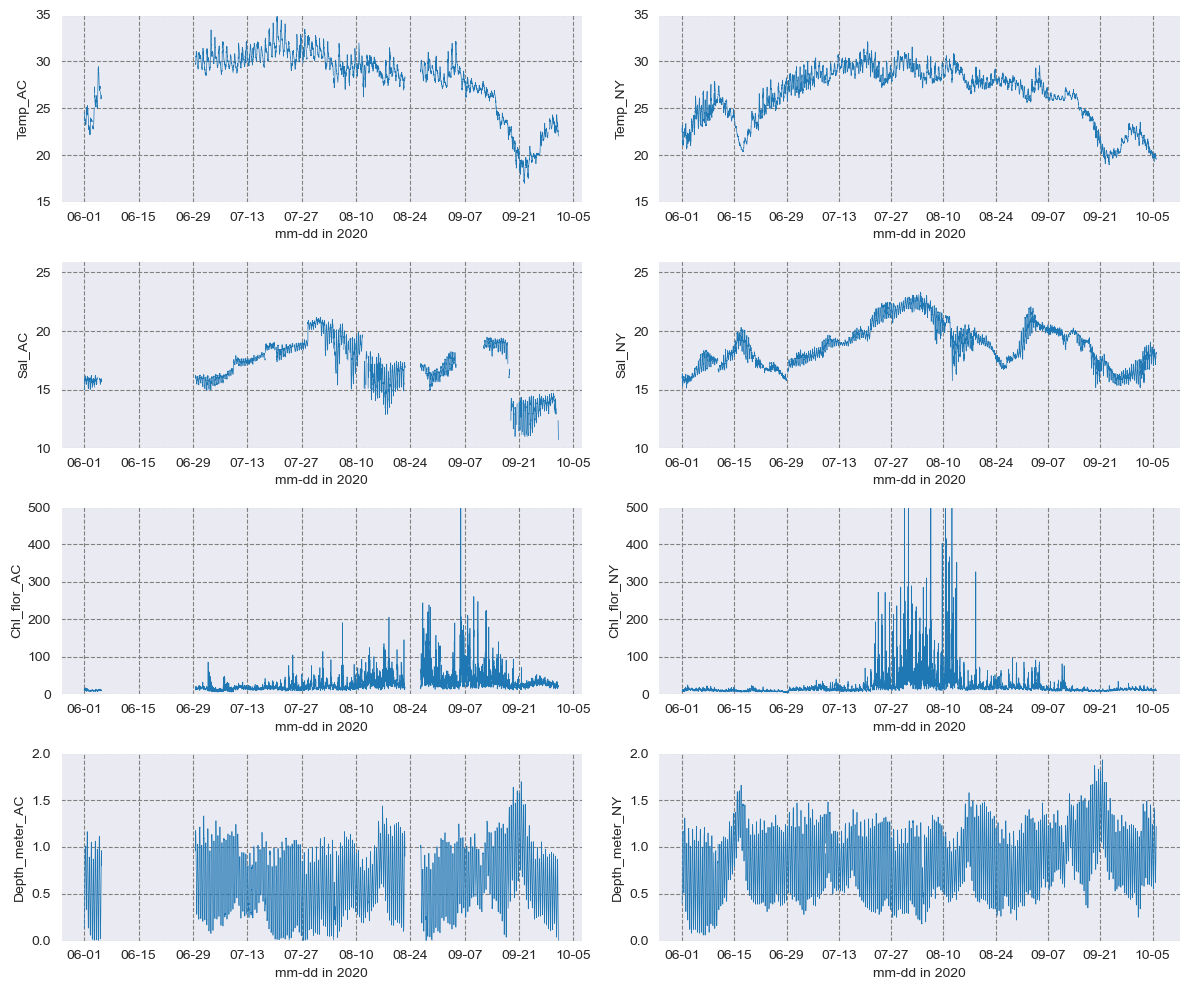

In [62]:
fig, ax = plt.subplots(4, 2, figsize=(12, 10))
nrows, ncols = 4, 2
y_limits = [(15, 35), (15, 35), (10, 26), (10, 26), (0, 500), (0, 500),(0, 2), (0, 2) ]
for n in range(1, 9):
            ax = plt.subplot(nrows, ncols, n)
            ax.plot(data['Date_Time_NY'], data.iloc[:,n-1], marker ='o', markersize = 0, linestyle='-', linewidth=0.5)
            ax.set_xlabel('mm-dd in 2020')
            ax.set_ylabel(data.columns[n-1])
            ax.set_ylim(y_limits[n-1] )
            ax.grid(True, color='gray', linestyle='--')
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=14)) # Set the y-axis tick locator and formatter
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
            xticks = [np.arange(dt.datetime(2020, 6, 1), dt.datetime(2020, 10, 6), dt.timedelta(days=14))]
            date_vector = np.ravel(xticks) # Flatten the numpy array into a one-dimensional vector
            ax.set_xticks(date_vector)

plt.tight_layout()
plt.show()

### (3) Seasonality analysis
#### Does the data have a clear cyclical/periodic pattern?

In [63]:
import statsmodels.api as sm
from matplotlib import rcParams
data = data.set_index('Date_Time_NY')

Now, let’s plot the seasonality of all types of parameters together:
* Note on seasonal_decompose function: it produces small figures by default. You have to control its aspects on your own and the plot function does not accept most of the regular Matplotlib parameters.

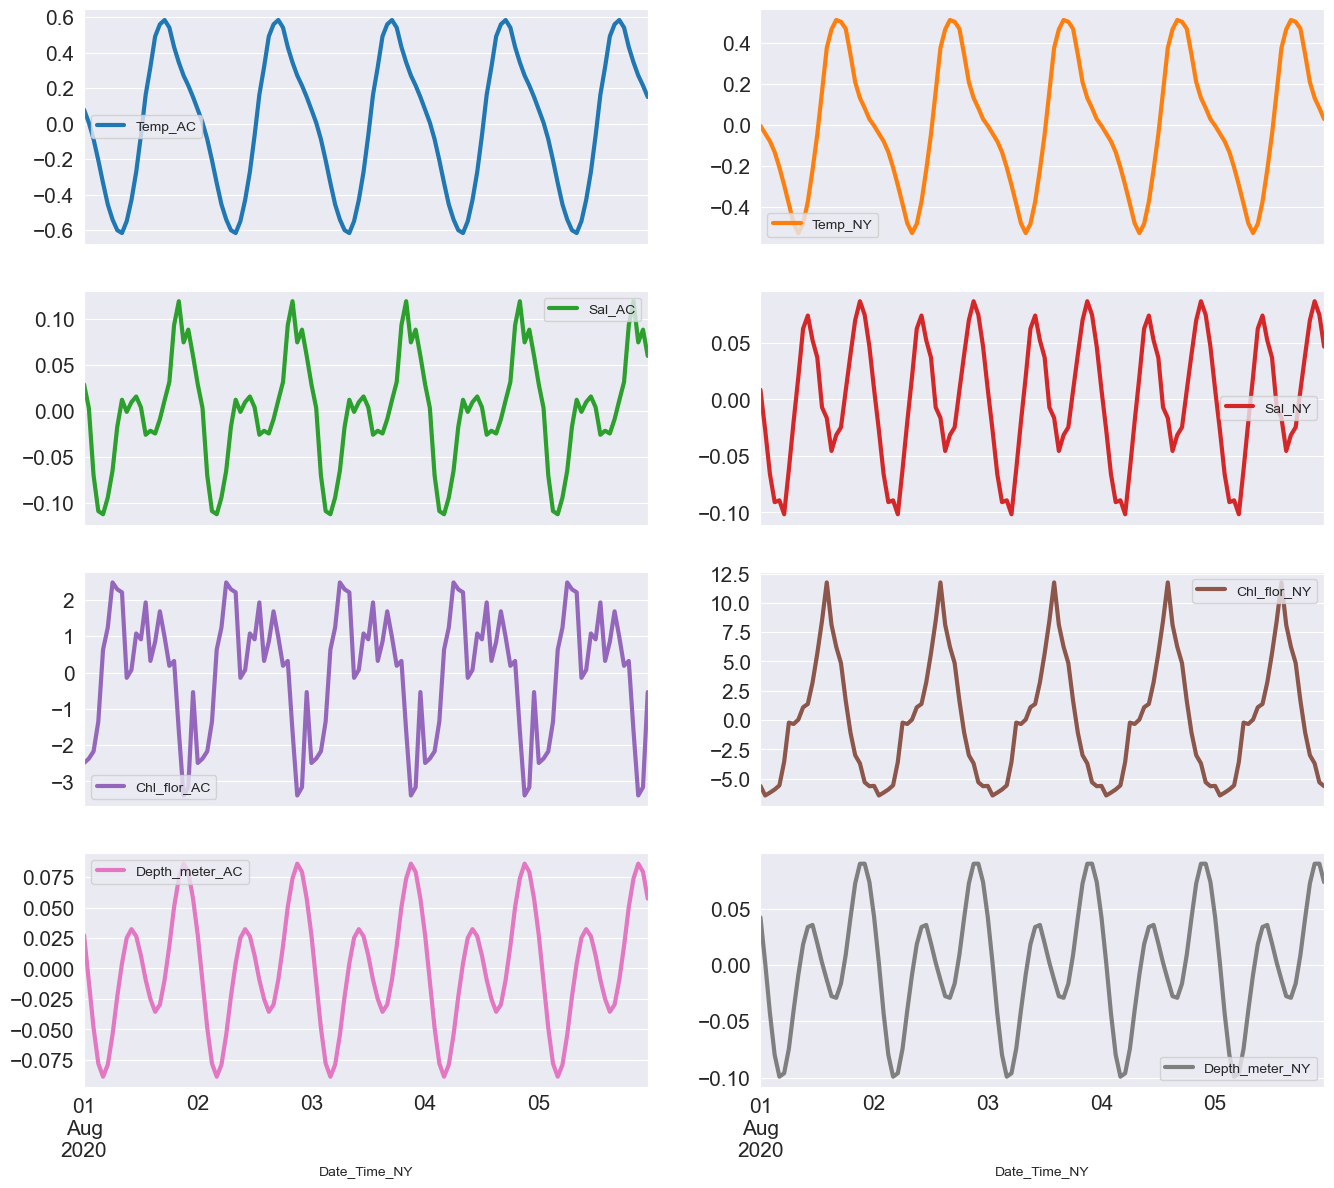

In [64]:
# Init empty dict to store decompose results
seasonality_dict = {}

for ts in data.columns:
    resampled_data = data[ts].resample('H').mean().fillna(method='ffill')
    decompositions = sm.tsa.seasonal_decompose(resampled_data)
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict)["Aug-01-2020":"Aug-05-2020"].plot(
    subplots=True, layout=(4, 2), linewidth=3, fontsize=15)
plt.show()

The top two panels shows that temperature have one high and one low value each day (likely due to solar radiation)
The second two panels shows salinity experience two highs and two lows each day, indicating a strong tidal cycles
The third two panels shows Chl experience daily cycle that is similar to temperature
The bottom two panels shows that Lafayette River experiences two low tides and two high tides each day

As you can see, each parameter has rather different seasonality patterns.
Temperature and Chl have DAILY patterns
Tide and Salinity have Semi-DAILY patterns

### (4) Trend Analysis

The above DecomposeResult object contains values that show the overall slope of a time series under the trend attribute.

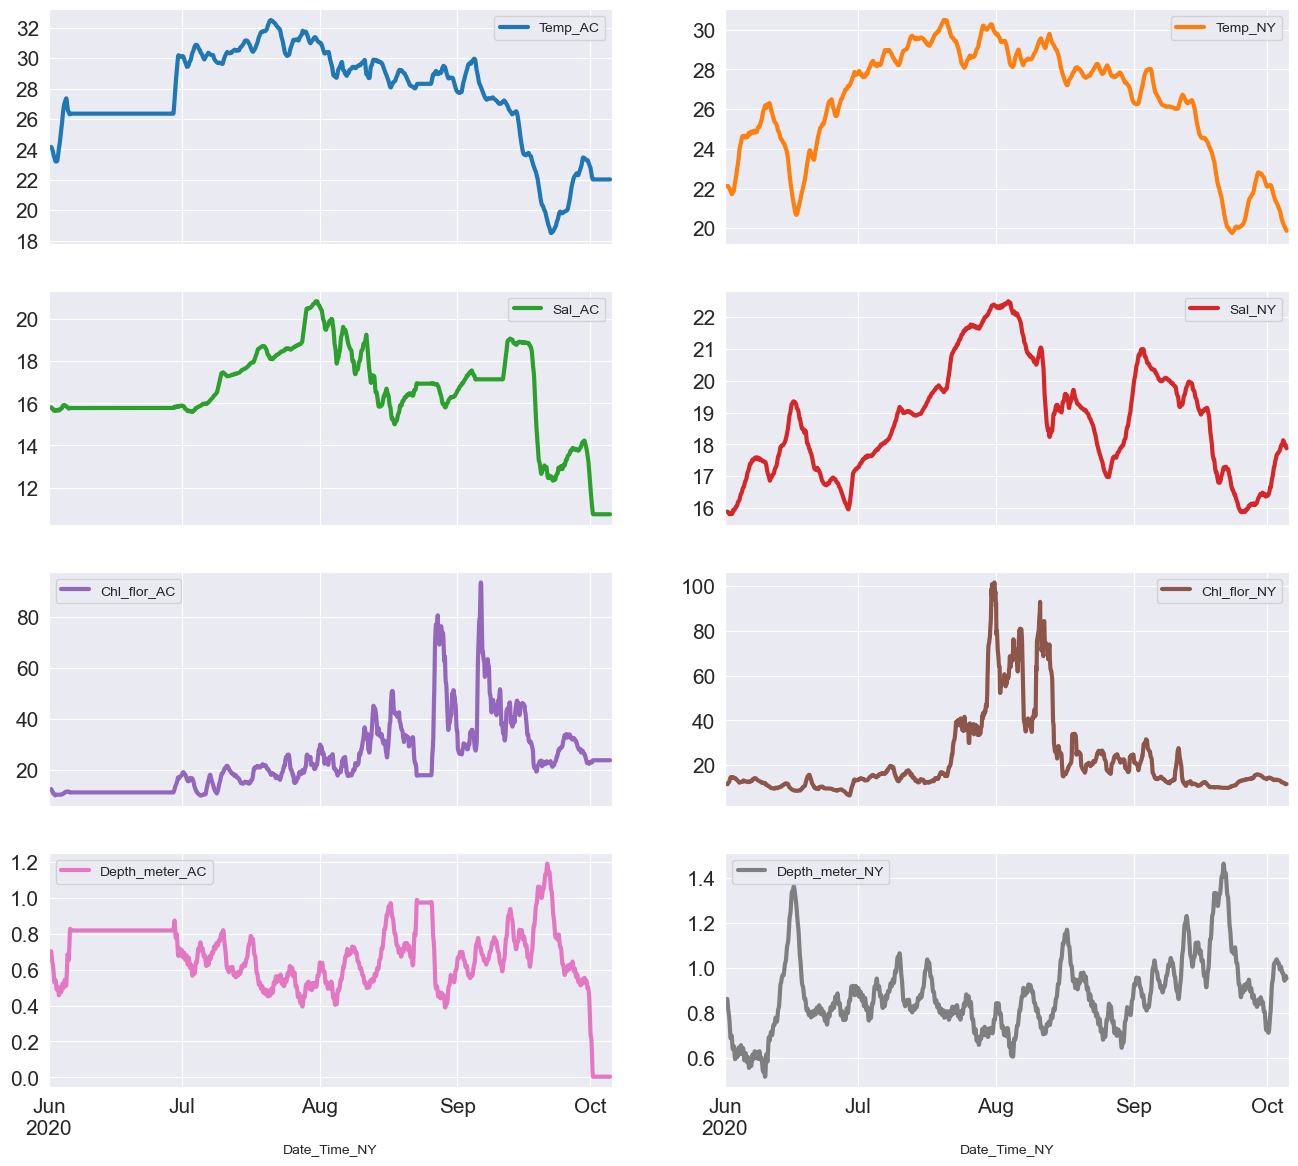

In [65]:
trend_dict = {}

for ts in data.columns:
    resampled_data = data[ts].resample('H').mean().fillna(method='ffill')
    decompositions = sm.tsa.seasonal_decompose(resampled_data)
    # Store back the results
    trend_dict[ts] = decompositions.trend

# plot
pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 2), linewidth=3,fontsize=15);

### (5) Noise
There is nothing fancy about it like the other two components. It only shows random and irregular data points that could not be attributed to either seasonality or trend.

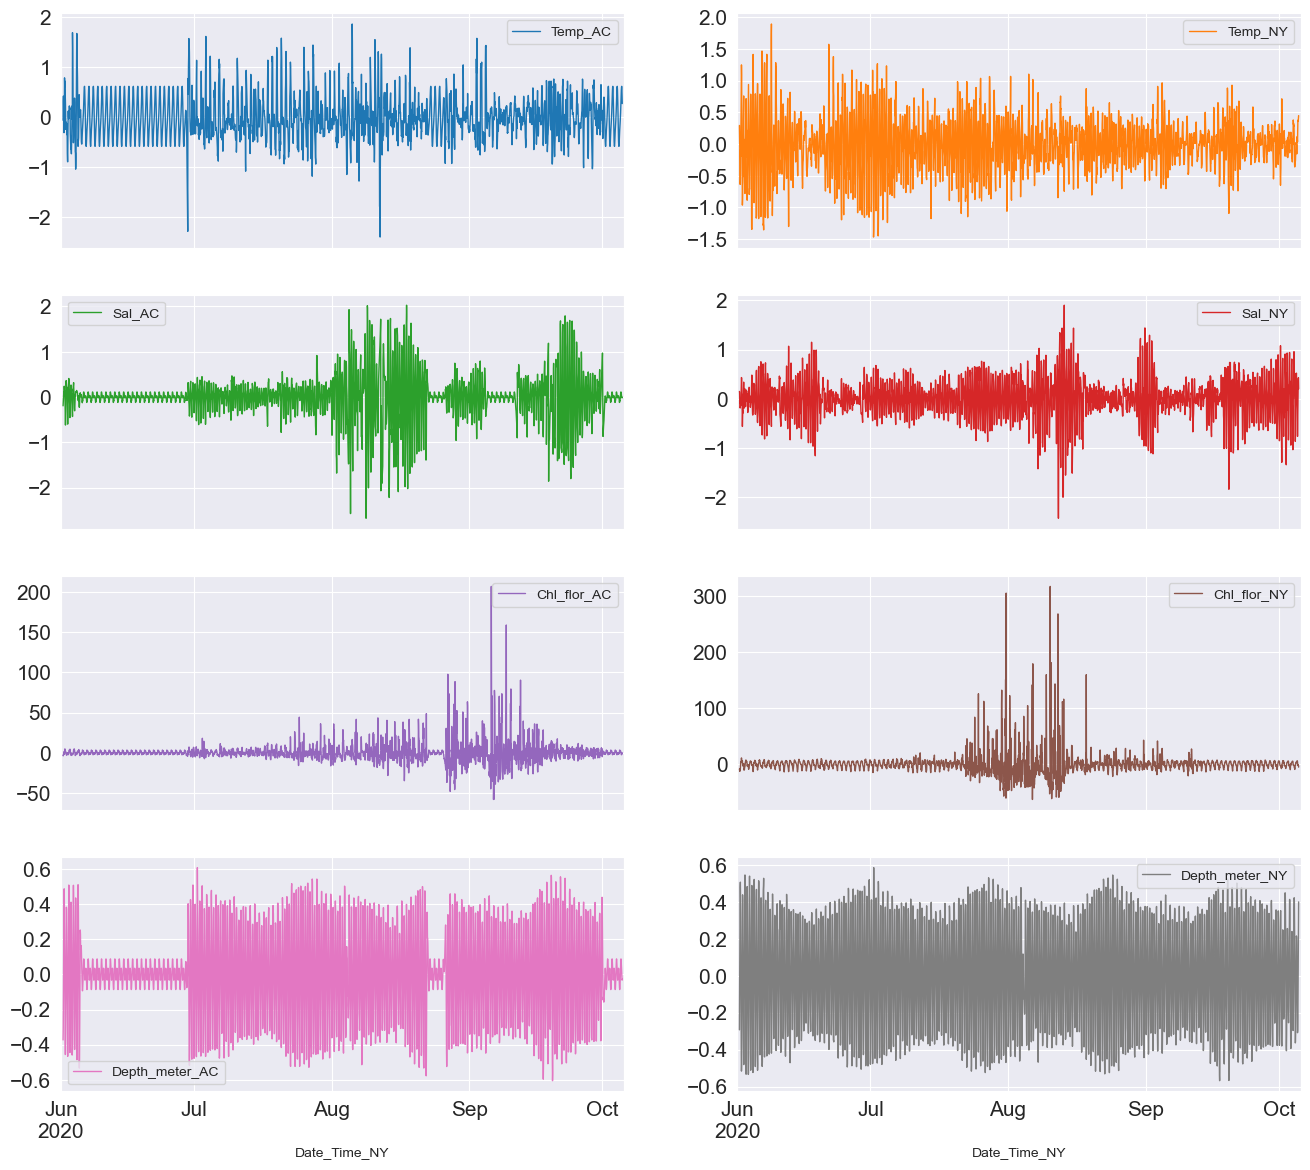

In [66]:
resid_dict = {}

for ts in data.columns:
    resampled_data = data[ts].resample('H').mean().fillna(method='ffill')
    decompositions = sm.tsa.seasonal_decompose(resampled_data)
    resid_dict[ts] = decompositions.resid

# plot
pd.DataFrame(resid_dict).plot(subplots=True, layout=(4, 2), linewidth=1,fontsize=15);

### Relationships between time series with correlation
* Heatmap

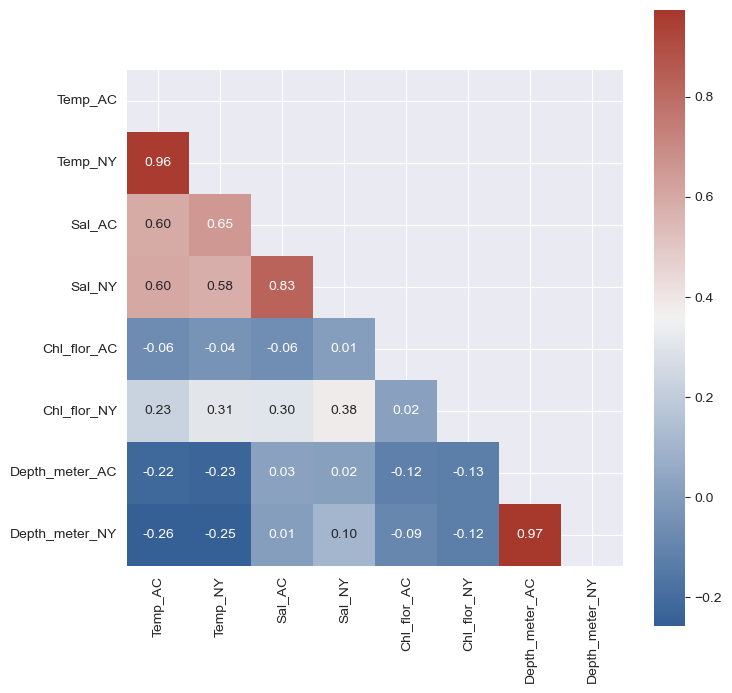

In [67]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show()

D:\anaconda3\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


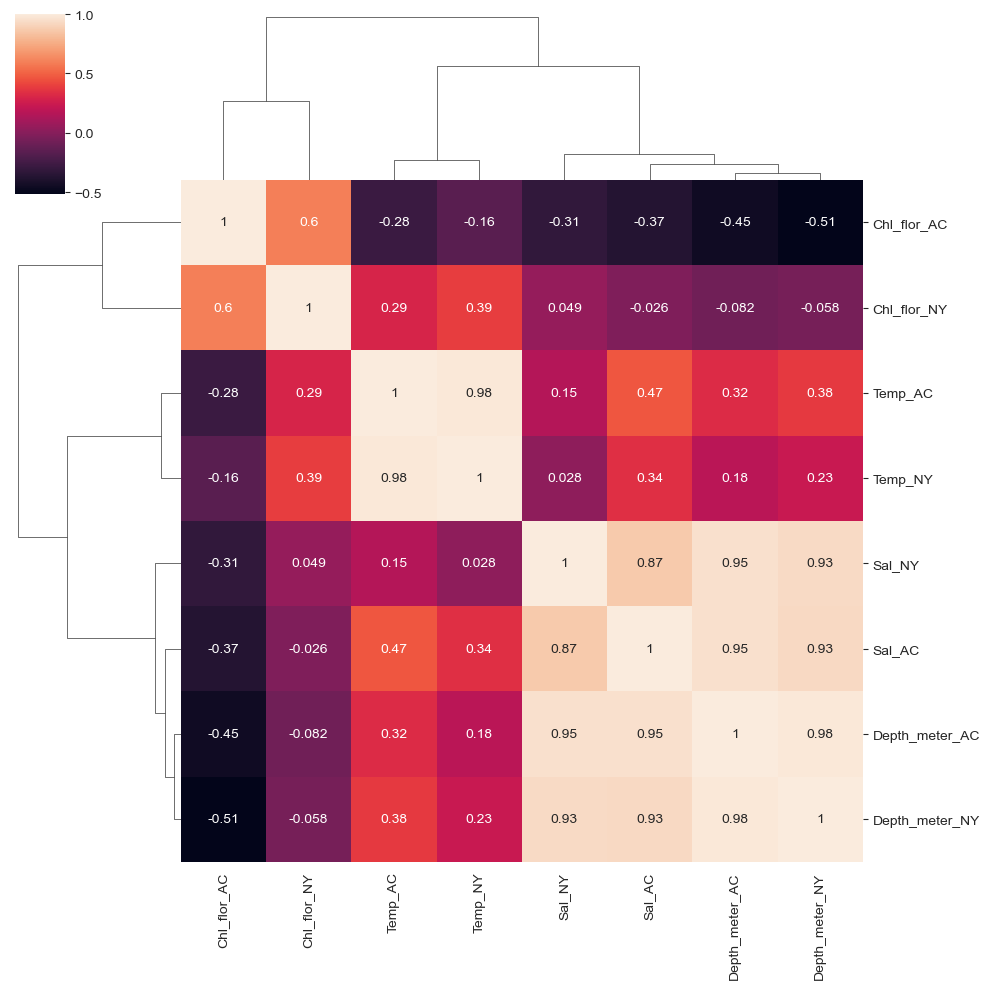

In [68]:

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show()

The plot tells us that the seasonality of tide and salinity are heavily correlated. This positive correlation can be indicative of close seasonality matches.

### (5) Auto-correlation Analysis

Auto-correlation analysis can be used to identify patterns or cyclic variations in time-series monitoring data in estuaries. For example, in estuaries, water quality parameters such as salinity, dissolved oxygen, pH, and nutrients can exhibit temporal variations due to factors such as tidal cycles, seasonal changes.

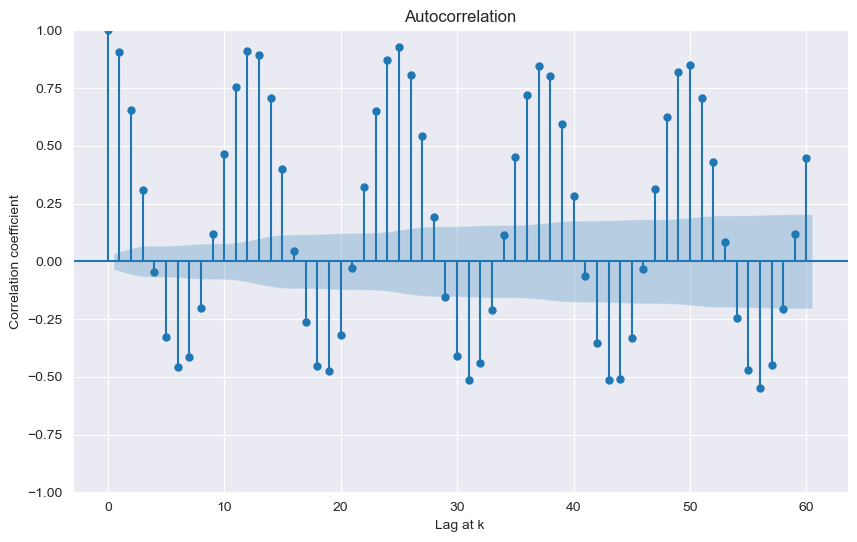

In [69]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6
resampled_data = data['Depth_meter_NY'].resample('H').mean().fillna(method='ffill')
# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(resampled_data, lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

Since one lag means 1 hour, this plot shows the high tides have ~12 hours lag, low tides have ~12 hours lag.


I will skip (7) Time-Series Modeling because it is Time-Series Forcasting and it is beyond the scope of this analysis

ARIMA models are often used in this modeling. It stands for Auto Regressive Integrated Moving Average check this article for more details https://pub.towardsai.net/time-series-forecasting-with-arima-models-in-python-part-1-c2940a7dbc48